# Network Measurement and Data Analysis Lab 3







In this homework; online clustering is implemented for feature based classification of probe requests. Preprocessing part is implemented as in provided notebook with slight modifications.


Fatih Temiz 10901682 

In [39]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
base_dir = 'C:/Users/fatih.temiz/PythonData/NetworkMeasurementNotebooks/MAC_derand_lecture-dataset/lecture-dataset'

df_list = list()

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root,file)

        df = pd.read_csv(file_path)
        df_list.append(df)

combine = pd.concat(df_list, ignore_index=True)

combine['Timestamp']=pd.to_datetime(combine['Timestamp'], unit='s')

display(combine)



,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-06-29 08:25:57.242888960,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
1,2021-06-29 08:25:57.263034112,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
2,2021-06-29 08:25:57.285024000,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
3,2021-06-29 08:25:57.305885952,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
4,2021-06-29 08:25:57.326790144,da:a1:19:d1:b8:3e,11,3.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,NaN,02040b16,0c1218243048606c,NaN,NaN,155,HuaweiHonor9_R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-07-08 10:25:22.283859968,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,UNICAmente,82848b961224486c,0c183060,NaN,NaN,289,SamsungJ6_K
4984,2021-07-08 10:25:22.313373184,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,UNICAmente,82848b961224486c,0c183060,NaN,NaN,289,SamsungJ6_K
4985,2021-07-08 10:25:22.315685120,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,UNICAmente,82848b961224486c,0c183060,NaN,NaN,289,SamsungJ6_K
4986,2021-07-08 10:25:22.318053888,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,UNICAmente,82848b961224486c,0c183060,NaN,NaN,289,SamsungJ6_K


In [69]:
combine_df = combine
nan_sum = combine_df.isna().sum()

nan_percentage = (nan_sum/len(combine_df))*100

print(nan_percentage)

col_drop = []

for i in range(0,len(nan_percentage)):
    if nan_percentage[i] > 60:
        col_drop.append(nan_percentage.index[i])

print(col_drop)

clean_df = combine_df.drop(col_drop, axis=1)

clean_df

Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64
['SSID', 'VHT Capabilities', 'HE Capabilities']


C:\Users\fatih.temiz\AppData\Local\Temp\ipykernel_22924\3672476684.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nan_percentage[i] > 60:


,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-06-29 08:25:57.242888960,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
1,2021-06-29 08:25:57.263034112,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
2,2021-06-29 08:25:57.285024000,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
3,2021-06-29 08:25:57.305885952,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
4,2021-06-29 08:25:57.326790144,da:a1:19:d1:b8:3e,11,3.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-07-08 10:25:22.283859968,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4984,2021-07-08 10:25:22.313373184,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4985,2021-07-08 10:25:22.315685120,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4986,2021-07-08 10:25:22.318053888,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K


In [70]:
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

for i in range(0,len(unique_elem)-1):
    if unique_elem[i] < 20:
        features.append(unique_elem.index[i])

print(features)



Timestamp                   4988
MAC Address                  718
Channel                        3
DS Channel                    13
HT Capabilities                8
Extended Capabilities          7
Vendor Specific Tags           5
Supported Rates                4
Extended Supported Rates       2
Length                        16
Label                          7
dtype: int64
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


C:\Users\fatih.temiz\AppData\Local\Temp\ipykernel_22924\119427851.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if unique_elem[i] < 20:


In [71]:
clean_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-06-29 08:25:57.242888960,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
1,2021-06-29 08:25:57.263034112,da:a1:19:d1:b8:3e,1,1.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
2,2021-06-29 08:25:57.285024000,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
3,2021-06-29 08:25:57.305885952,da:a1:19:d1:b8:3e,1,2.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
4,2021-06-29 08:25:57.326790144,da:a1:19:d1:b8:3e,11,3.0,210017ff00000000000000000080010000000000000000...,8.800140e+10,00904c0408bf0c3250800ffeff0000feff0000,02040b16,0c1218243048606c,155,HuaweiHonor9_R
...,...,...,...,...,...,...,...,...,...,...,...
4983,2021-07-08 10:25:22.283859968,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4984,2021-07-08 10:25:22.313373184,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4985,2021-07-08 10:25:22.315685120,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K
4986,2021-07-08 10:25:22.318053888,00:0f:00:6a:68:8b,1,NaN,6e0102ff000000000000000000000000000000000e0000...,1.000000e+14,0050f204104a000110103a00010010080002228c104800...,82848b961224486c,0c183060,289,SamsungJ6_K


Probe Requests does not grouped into burst by mac adresses since aim is clustering every received probe requests and mac derandomization aims features based clustering without considering mac addresses since they are randomized

In [72]:

def encoder(df,features):
    df_tmp = df.copy()
    for elem in features:
        if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel':
            label_encoder = LabelEncoder()
            df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

    df_tmp[features]=df_tmp[features].astype(float)
    return df_tmp

encoded_df = encoder(clean_df,features)

burst_df = encoded_df.drop(['Timestamp'],axis=1)
#burst_df = burst_df.groupby(['MAC Address'])

#burst_df = burst_df.first().reset_index()

display(burst_df)

label_count = burst_df["Label"].value_counts()
print(label_count)




,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,da:a1:19:d1:b8:3e,1.0,1.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R
1,da:a1:19:d1:b8:3e,1.0,1.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R
2,da:a1:19:d1:b8:3e,1.0,2.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R
3,da:a1:19:d1:b8:3e,1.0,2.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R
4,da:a1:19:d1:b8:3e,11.0,3.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R
...,...,...,...,...,...,...,...,...,...,...
4983,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K
4984,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K
4985,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K
4986,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K


Label
HuaweiHonor9_R    2394
iPhone6_N          787
SamsungJ6_K        728
iPhone11-C_a       531
iPhone12_W         263
iPhoneXR-U         146
S21Ultra-M_a       139
Name: count, dtype: int64


In [73]:
selected_features = ["HT Capabilities", "Extended Capabilities",
                     "Vendor Specific Tags","Supported Rates","Extended Supported Rates","Length","Channel",
                     "DS Channel"]

Feature Similarity for Clustering Decision:
Each data point is evaluated to determine its cluster based on the similarity of its features.
A probe is assigned to an existing cluster if at least 'N' of its features match any of the features of any centroid in that cluster.
The specific features being matched are not important, only the count of matches.
If two or more centroids have the same highest number of matching features with the probe, a tie-breaking rule applies (first centroid with the maximum matches wins).

In [74]:
def online_clustering(df, selected_features, N):
    centroids = [df[selected_features].iloc[0].values]
    cluster_assignments = [0]  

    for i in range(1, len(df)):
        point = df[selected_features].iloc[i].values
        max_matches = 0
        best_centroid_idx = -1
        for idx, centroid in enumerate(centroids):
            matches = np.sum(centroid == point)
            if matches > max_matches:
                max_matches = matches
                best_centroid_idx = idx
        if max_matches >= N:
            cluster_assignments.append(best_centroid_idx)
        else:
            centroids.append(point)
            cluster_assignments.append(len(centroids) - 1)

    df['Cluster ID'] = cluster_assignments
    v_measure = v_measure_score(df['Label'], df['Cluster ID'])
    error = abs(len(set(cluster_assignments)) - len(df['Label'].unique()))
    return df, v_measure, error


best_N = None
best_v_measure = 0
best_error = float('inf')
best_cluster_df = pd.DataFrame()

for N in range(1, len(selected_features) + 1):
    
    clustered_df, v_measure, error = online_clustering(burst_df.copy(), selected_features, N)
    print(N,v_measure,error)
    if best_error > error or (error == best_error and best_v_measure < v_measure) :
        best_N = N
        best_v_measure = v_measure
        best_error = error
        best_cluster_df = clustered_df

best_N, best_v_measure, best_error


1 0.011526305537337404 5
2 0.39738496744923996 3
3 0.7264298753718509 1
4 0.9327657893937348 1
5 0.949044767951222 2
6 0.8745172184580312 9
7 0.7072440540430508 24
8 0.520159532521614 164


(4, 0.9327657893937348, 1)

According to above results, best N is calculated considering two parameters error and v_measure (combined completeness and homogeneity), N=4 gives the best result which be used later in following tasks

In [83]:
best_cluster_df

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
0,da:a1:19:d1:b8:3e,1.0,1.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R,0
1,da:a1:19:d1:b8:3e,1.0,1.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R,0
2,da:a1:19:d1:b8:3e,1.0,2.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R,0
3,da:a1:19:d1:b8:3e,1.0,2.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R,0
4,da:a1:19:d1:b8:3e,11.0,3.0,0.0,6.0,3.0,0.0,0.0,8.0,HuaweiHonor9_R,0
...,...,...,...,...,...,...,...,...,...,...,...
4983,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,7
4984,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,7
4985,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,7
4986,00:0f:00:6a:68:8b,1.0,NaN,7.0,0.0,2.0,2.0,1.0,14.0,SamsungJ6_K,7


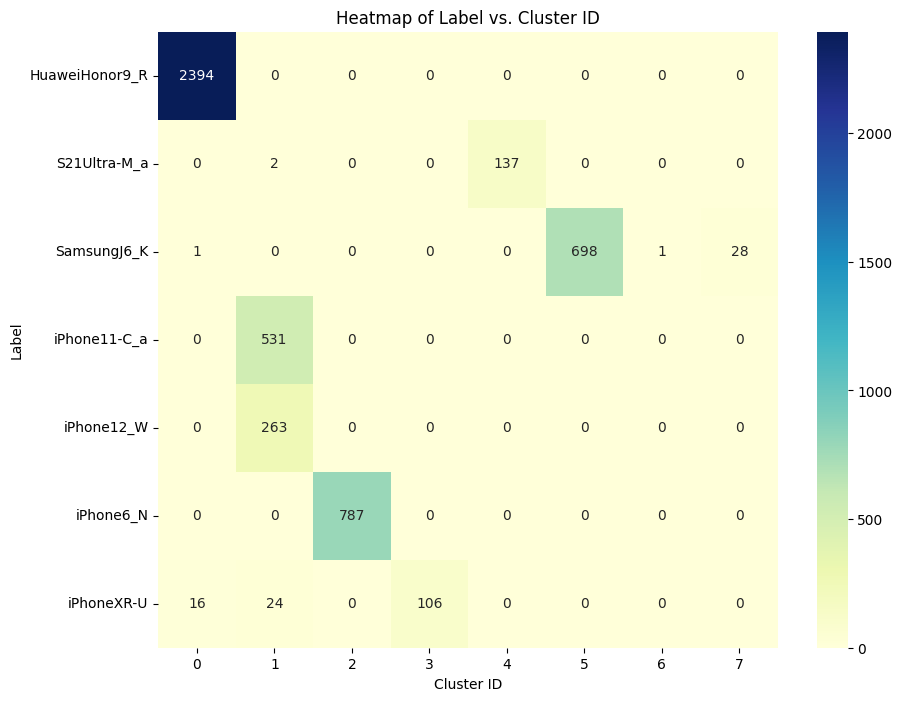

In [84]:
# Create a crosstab table
crosstab = pd.crosstab(best_cluster_df['Label'], best_cluster_df['Cluster ID'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Label vs. Cluster ID')
plt.xlabel('Cluster ID')
plt.ylabel('Label')
plt.show()

Results are investigated; same phone devices iPhone 11 and iPhone 12 have very similar features thats why it is hard to cluster them differently (e.g. vendor specific tags etc. features are same) . Also, there is a single cluster case for SamsungJ6_k device where DS Channel feature is NaN and other features are quite different; which can be analyzed as anomaly for future work. Problematic cases shown below.

In [85]:
unique,counts=np.unique(best_cluster_df["Label"],return_counts=True)


for element,count in zip(unique,counts):
    print(f'Element{element},Count:{count}')


ElementHuaweiHonor9_R,Count:2394
ElementS21Ultra-M_a,Count:139
ElementSamsungJ6_K,Count:728
ElementiPhone11-C_a,Count:531
ElementiPhone12_W,Count:263
ElementiPhone6_N,Count:787
ElementiPhoneXR-U,Count:146


In [89]:
best_cluster_df[best_cluster_df['Cluster ID']==5]

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
4261,7a:e3:17:f9:50:df,11.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4262,7a:e3:17:f9:50:df,11.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4263,7a:e3:17:f9:50:df,1.0,1.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4264,7a:e3:17:f9:50:df,11.0,2.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4265,7a:e3:17:f9:50:df,1.0,2.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
...,...,...,...,...,...,...,...,...,...,...,...
4968,5a:a1:51:c2:71:6f,11.0,11.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4969,5a:a1:51:c2:71:6f,11.0,11.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4970,5a:a1:51:c2:71:6f,11.0,12.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5
4971,5a:a1:51:c2:71:6f,11.0,12.0,1.0,4.0,0.0,0.0,0.0,3.0,SamsungJ6_K,5


In [90]:
best_cluster_df[best_cluster_df['Cluster ID']==6]

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
4599,00:0f:00:6a:68:8b,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K,6


In [93]:
best_cluster_df[best_cluster_df['Label']=='iPhone11-C_a']

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
2394,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2395,06:ac:28:5b:d9:63,1.0,1.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2396,f7:95:30:e5:7c:3e,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2397,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2398,c6:30:ee:18:34:a8,6.0,5.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
...,...,...,...,...,...,...,...,...,...,...,...
2920,0f:11:4f:1c:42:5f,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2921,ef:48:f5:b3:ab:5b,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2922,ef:48:f5:b3:ab:5b,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1
2923,28:a0:54:0f:52:67,1.0,3.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,1


In [96]:
best_cluster_df[best_cluster_df['Label']=='iPhone12_W']

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster ID
2925,26:48:73:18:ff:30,6.0,7.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
2926,86:b8:89:d5:35:5a,6.0,5.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
2927,d2:a7:fc:a6:e6:12,1.0,3.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
2928,d2:a7:fc:a6:e6:12,1.0,3.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
2929,06:3f:62:63:54:b9,6.0,8.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
...,...,...,...,...,...,...,...,...,...,...,...
3183,b6:ad:ea:83:ab:12,6.0,7.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
3184,ba:1b:7e:55:ea:ff,6.0,5.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
3185,5a:99:6d:de:8f:e5,6.0,6.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1
3186,5a:99:6d:de:8f:e5,6.0,6.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,1


In [87]:
unique,counts=np.unique(best_cluster_df["Cluster ID"],return_counts=True)


for element,count in zip(unique,counts):
    print(f'Element{element},Count:{count}')


Element0,Count:2411
Element1,Count:820
Element2,Count:787
Element3,Count:106
Element4,Count:137
Element5,Count:698
Element6,Count:1
Element7,Count:28
